In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = 'DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [3]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [5]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [6]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [7]:
# Duplicated
df.duplicated().sum()

np.int64(14342)

In [8]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

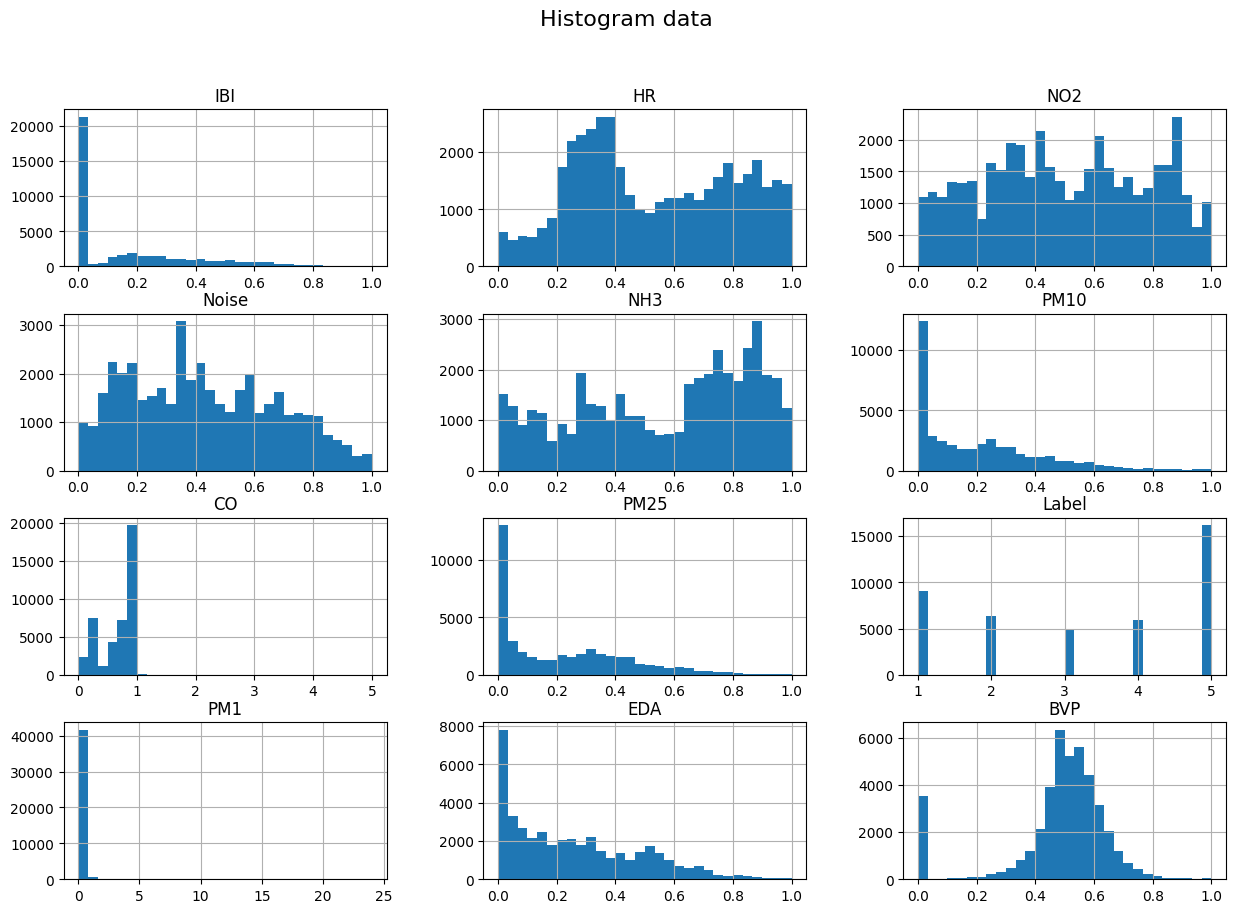

In [9]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [10]:
df.shape

(42436, 12)

C:\Users\HP\AppData\Local\Temp\ipykernel_1844\3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


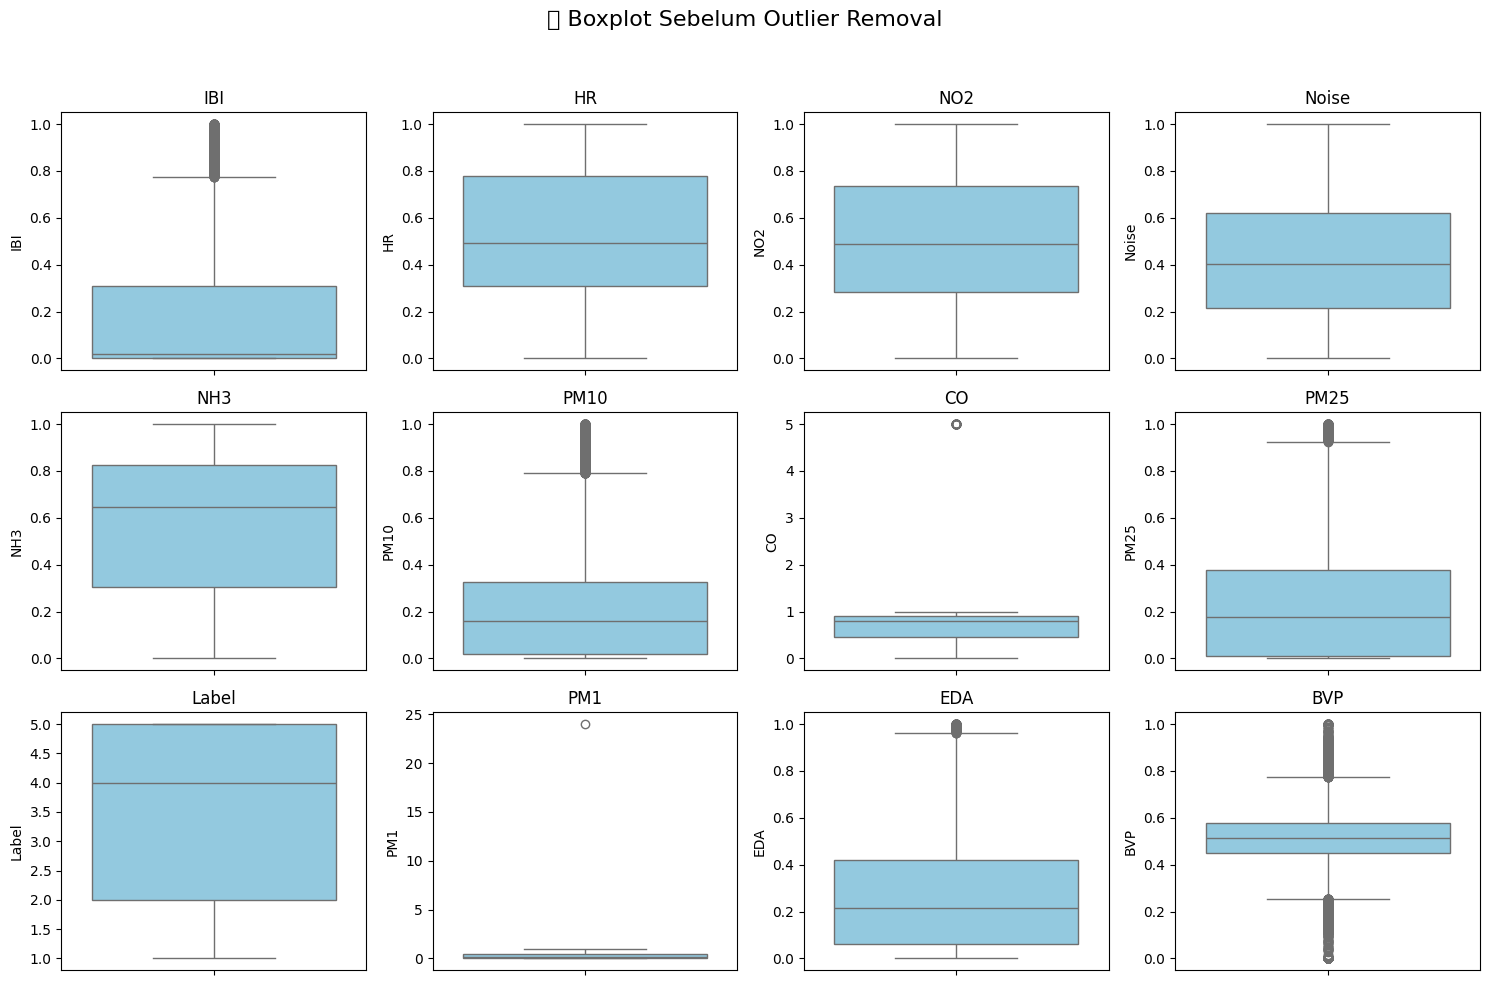

In [11]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [12]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [13]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


C:\Users\HP\AppData\Local\Temp\ipykernel_1844\230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


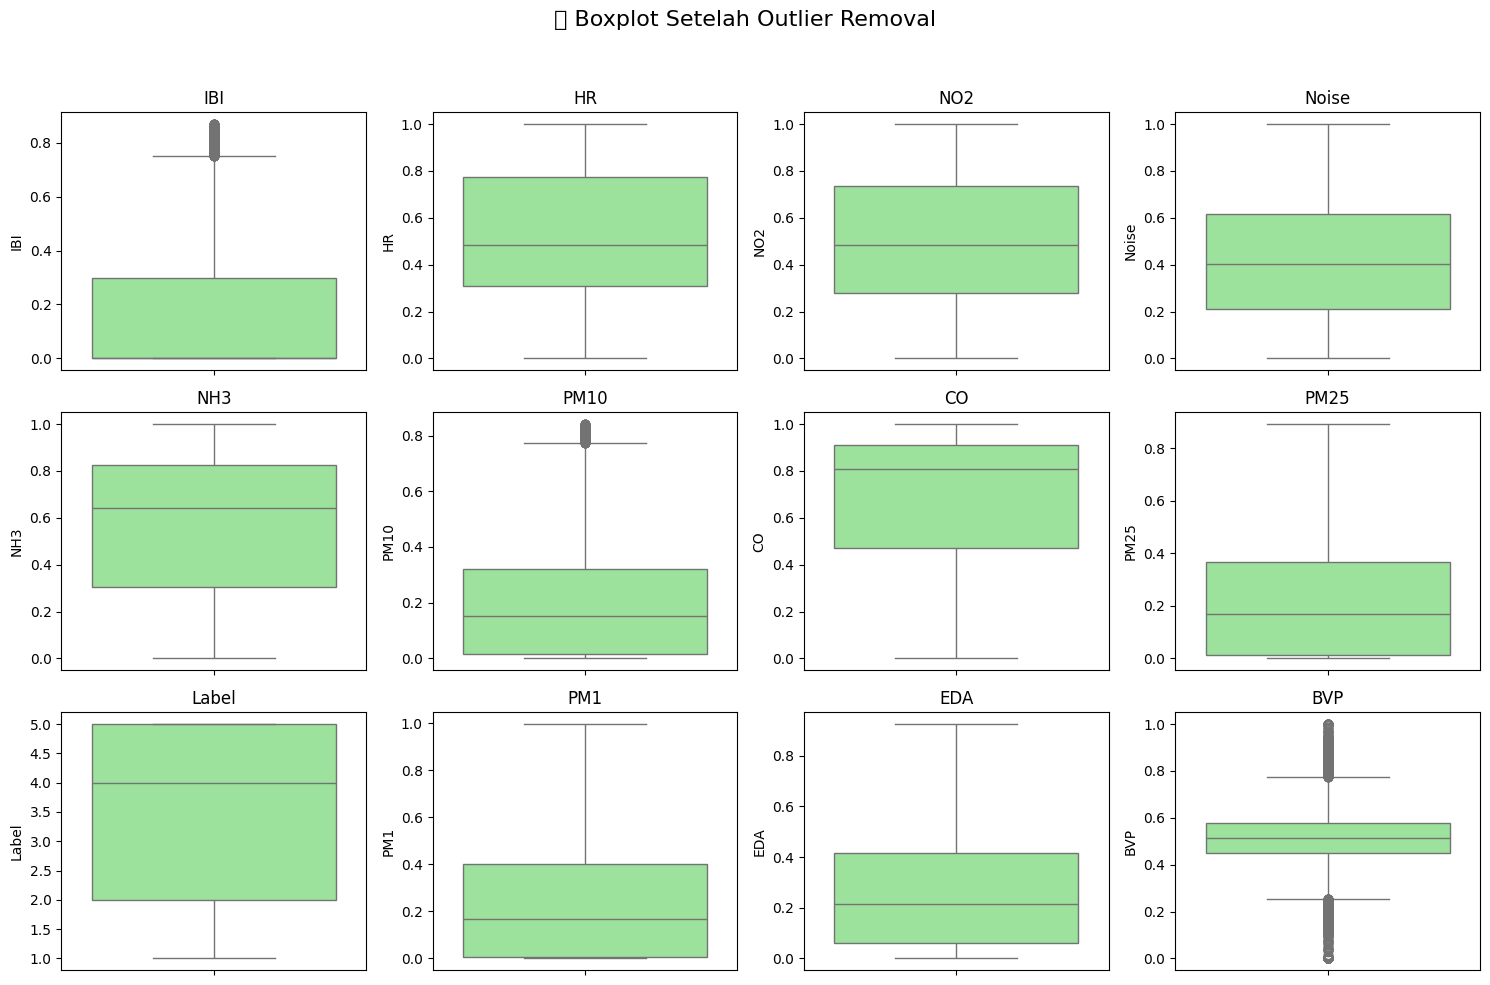

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


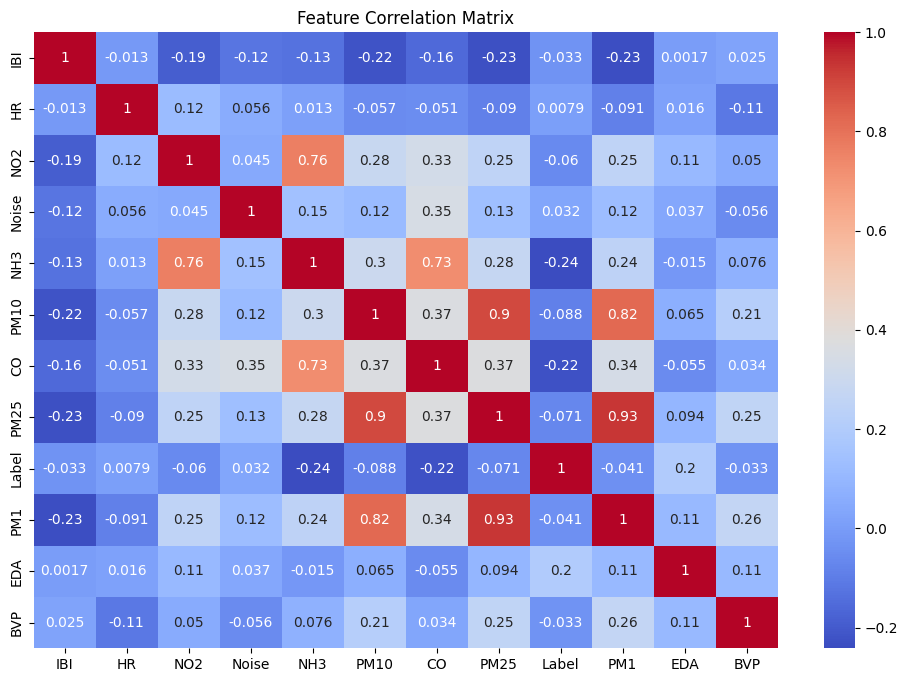

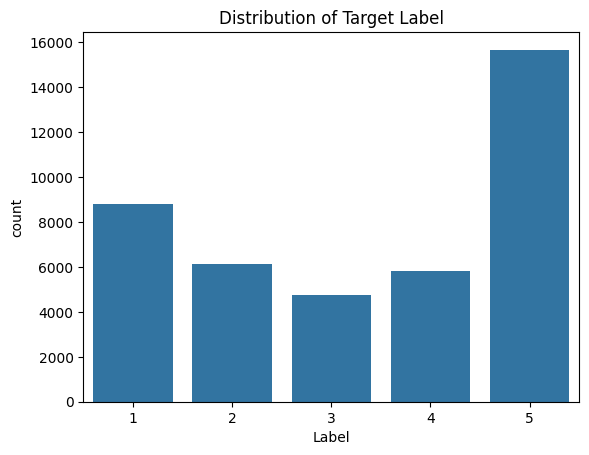

In [15]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [16]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [17]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


In [18]:
import pandas as pd
## under sampling
# Gabungkan X dan y biar gampang sampling
df_full = X.copy()
df_full["Label"] = y

# Cari jumlah terkecil
min_count = df_full["Label"].value_counts().min()  # 4741

# Undersampling per kelas
df_balanced = (
    df_full.groupby("Label", group_keys=False)
           .apply(lambda x: x.sample(min_count, random_state=42))
)
### data balance

# Pisahkan lagi X dan y
X_balanced = df_balanced.drop("Label", axis=1)
y_balanced = df_balanced["Label"]

print(X_balanced.shape)        # (23705, 11)
print(y_balanced.value_counts())


(23705, 11)
Label
1    4741
2    4741
3    4741
4    4741
5    4741
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_1844\759403527.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


In [19]:
X_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23705 entries, 28056 to 4698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     23705 non-null  float64
 1   HR      23705 non-null  float64
 2   NO2     23705 non-null  float64
 3   Noise   23705 non-null  float64
 4   NH3     23705 non-null  float64
 5   PM10    23705 non-null  float64
 6   CO      23705 non-null  float64
 7   PM25    23705 non-null  float64
 8   PM1     23705 non-null  float64
 9   EDA     23705 non-null  float64
 10  BVP     23705 non-null  float64
dtypes: float64(11)
memory usage: 2.2 MB


## Prepocessing

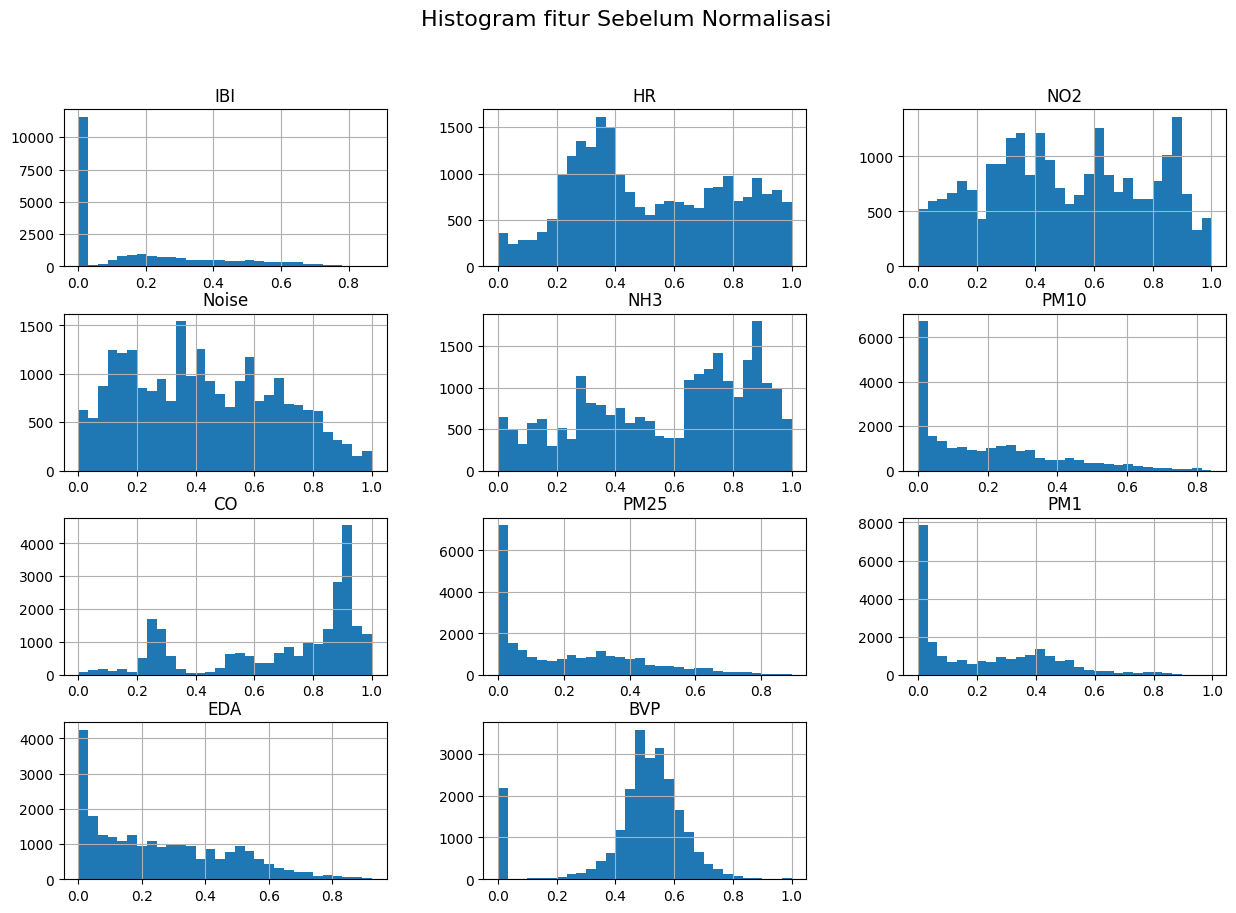

In [20]:
# Histogram sebelum normalisasi
X_balanced.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [22]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (18964, 11)
Data Test after normalisation = (4741, 11)


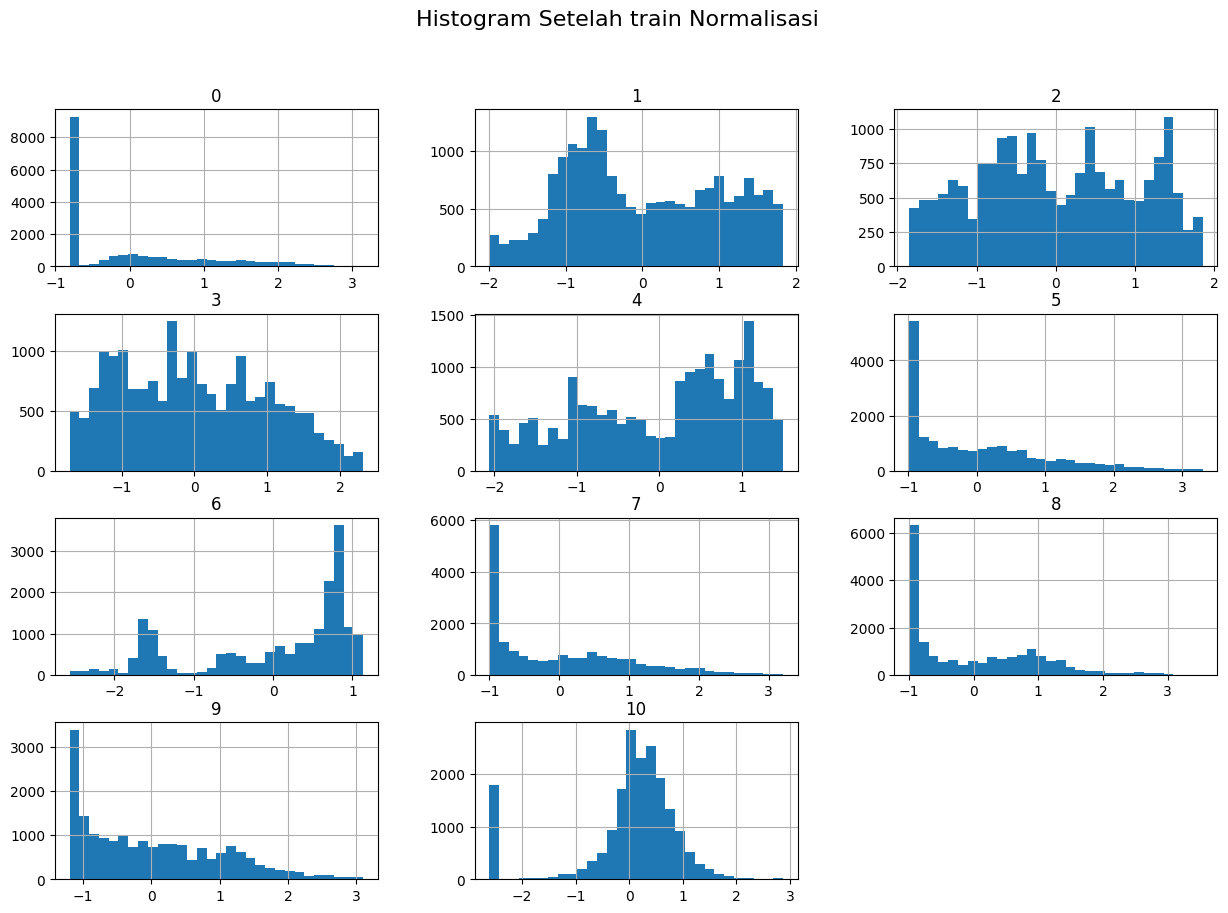

In [23]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

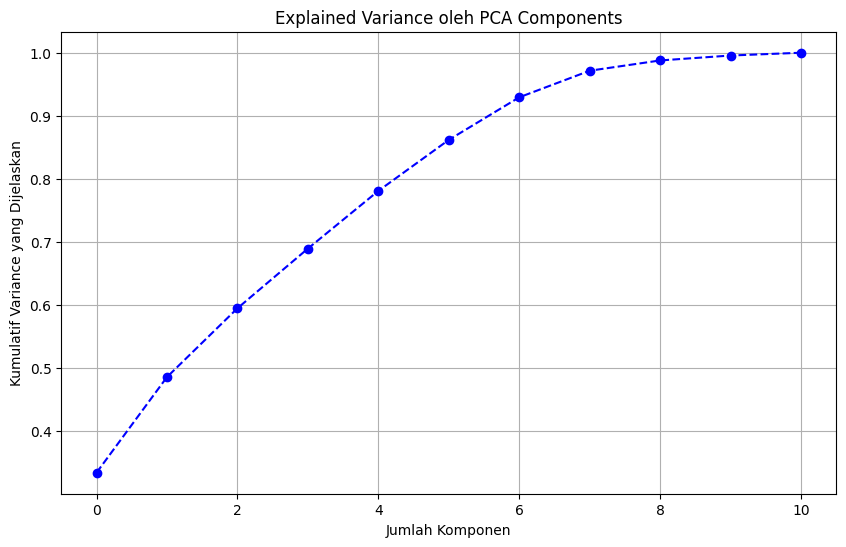

In [24]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [25]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3344 variance terjelaskan
Komponen ke-2: 0.4860 variance terjelaskan
Komponen ke-3: 0.5950 variance terjelaskan
Komponen ke-4: 0.6896 variance terjelaskan
Komponen ke-5: 0.7810 variance terjelaskan
Komponen ke-6: 0.8619 variance terjelaskan
Komponen ke-7: 0.9293 variance terjelaskan
Komponen ke-8: 0.9715 variance terjelaskan
Komponen ke-9: 0.9878 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [31]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18964, 7)
Shape test PCA: (4741, 7)


## Training Data

In [27]:
# import pandas as pd

# # Base (data sebelum normalisasi dan PCA)
# print("\n=== X_train (original) ===")
# print(pd.DataFrame(X_train).head())
# print("Shape:", X_train.shape)

# print("\n=== X_test (original) ===")
# print(pd.DataFrame(X_test).head())
# print("Shape:", X_test.shape)

# print("\n=== y_train ===")
# print(y_train.head())
# print("Shape:", y_train.shape)

# print("\n=== y_test ===")
# print(y_test.head())
# print("Shape:", y_test.shape)

# # Normalisasi
# print("\n=== X_train_scaled (StandardScaler) ===")
# print(pd.DataFrame(X_train_pca).head())
# print("Shape:", X_train_pca.shape)

# print("\n=== X_test_scaled (StandardScaler) ===")
# print(pd.DataFrame(X_test_pca).head())
# print("Shape:", X_test_pca.shape)

# # PCA
# print("\n=== X_train_pca (7 komponen) ===")
# print(pd.DataFrame(X_train_pca).head())
# print("Shape:", X_train_pca.shape)

# print("\n=== X_test_pca (7 komponen) ===")
# print(pd.DataFrame(X_test_pca).head())
# print("Shape:", X_test_pca.shape)



=== X_train (original) ===
            IBI        HR       NO2     Noise       NH3      PM10        CO  \
1131   0.000000  0.867795  0.825448  0.603816  0.729968  0.034172  0.692364   
2622   0.000000  0.290148  0.819745  0.382936  0.846152  0.590623  0.904430   
7113   0.227454  0.860691  0.925926  0.297213  0.872917  0.172247  0.862272   
11616  0.000000  0.679016  0.117215  0.670117  0.524605  0.061899  0.911825   
35833  0.000000  0.679016  0.666667  0.607085  0.739707  0.311080  0.981992   

           PM25       PM1       EDA       BVP  
1131   0.034172  0.034172  0.000000  0.000000  
2622   0.245120  0.194478  0.584707  0.510548  
7113   0.196181  0.289760  0.485102  0.519017  
11616  0.106957  0.137517  0.512229  0.542079  
35833  0.278134  0.337950  0.255638  0.632904  
Shape: (18964, 11)

=== X_test (original) ===
            IBI        HR       NO2     Noise       NH3      PM10        CO  \
11559  0.000000  0.391106  0.337130  0.763358  0.493354  0.282452  0.989683   
1457 

Training menggunakan  data split normalization


🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       970
           2       0.96      0.98      0.97       925
           3       0.98      0.98      0.98       937
           4       0.97      0.96      0.97       950
           5       0.96      0.98      0.97       959

    accuracy                           0.97      4741
   macro avg       0.97      0.97      0.97      4741
weighted avg       0.97      0.97      0.97      4741



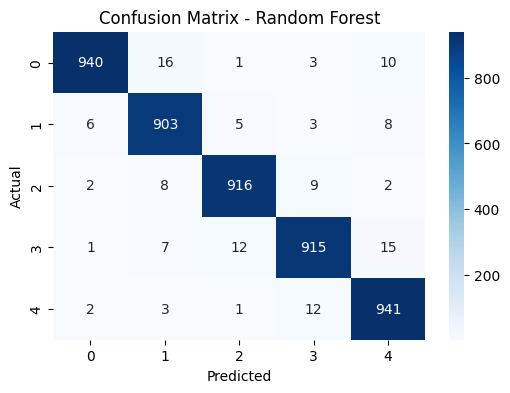


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       970
           2       0.94      0.97      0.96       925
           3       0.96      0.95      0.96       937
           4       0.96      0.95      0.95       950
           5       0.93      0.94      0.93       959

    accuracy                           0.95      4741
   macro avg       0.95      0.95      0.95      4741
weighted avg       0.95      0.95      0.95      4741



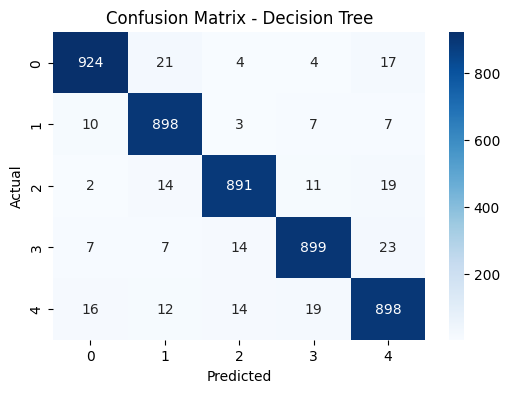


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.93      0.93      0.93       970
           2       0.92      0.94      0.93       925
           3       0.90      0.93      0.91       937
           4       0.90      0.90      0.90       950
           5       0.95      0.89      0.92       959

    accuracy                           0.92      4741
   macro avg       0.92      0.92      0.92      4741
weighted avg       0.92      0.92      0.92      4741



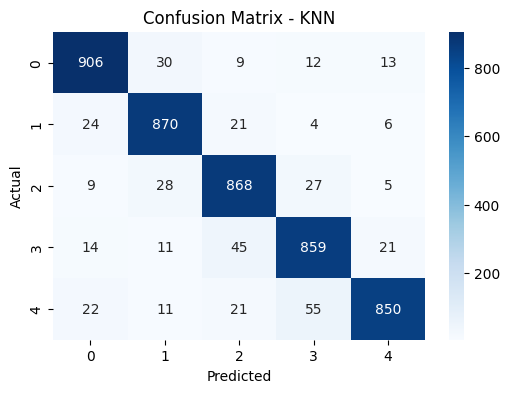


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.35      0.61      0.45       970
           2       0.50      0.69      0.58       925
           3       0.35      0.21      0.27       937
           4       0.34      0.28      0.31       950
           5       0.48      0.21      0.30       959

    accuracy                           0.40      4741
   macro avg       0.41      0.40      0.38      4741
weighted avg       0.40      0.40      0.38      4741



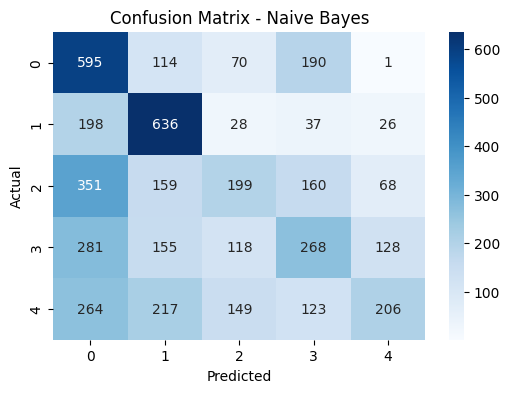


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.973423   0.973461  0.973453  0.973411
Decision Tree  0.951276   0.951380  0.951401  0.951331
KNN            0.918161   0.918551  0.918294  0.918130
Naive Bayes    0.401603   0.405253  0.402052  0.379264


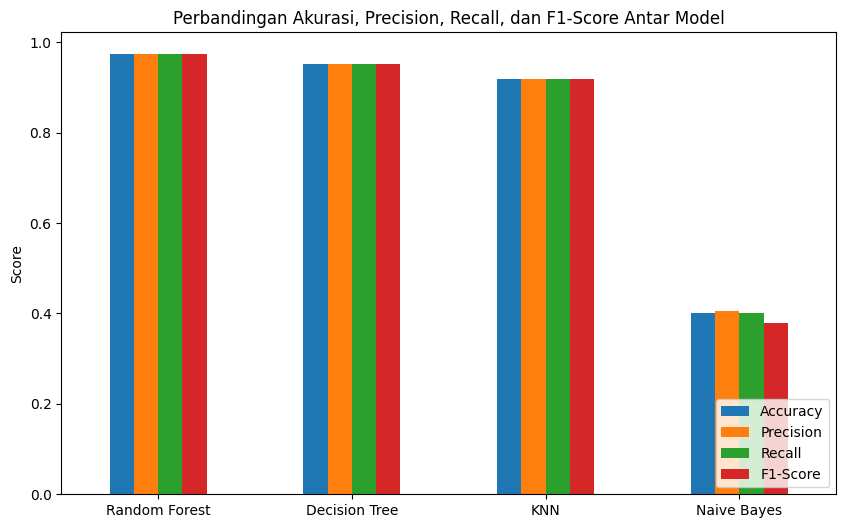

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_scaled, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_scaled)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 7

In [32]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)

Shape train PCA: (18964, 7)
Shape test PCA: (4741, 7)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.93      0.94      0.93       970
           2       0.93      0.94      0.93       925
           3       0.91      0.93      0.92       937
           4       0.92      0.90      0.91       950
           5       0.92      0.90      0.91       959

    accuracy                           0.92      4741
   macro avg       0.92      0.92      0.92      4741
weighted avg       0.92      0.92      0.92      4741



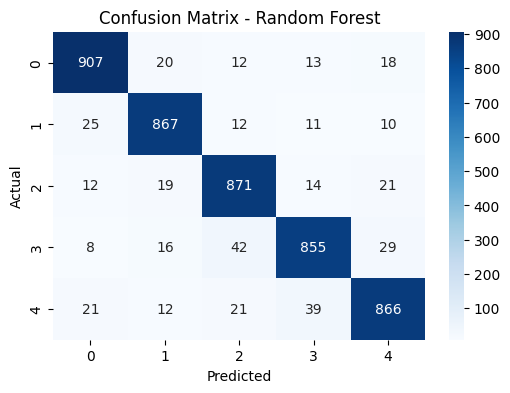


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.87      0.88      0.88       970
           2       0.88      0.91      0.90       925
           3       0.86      0.89      0.87       937
           4       0.87      0.85      0.86       950
           5       0.85      0.81      0.83       959

    accuracy                           0.87      4741
   macro avg       0.87      0.87      0.87      4741
weighted avg       0.87      0.87      0.87      4741



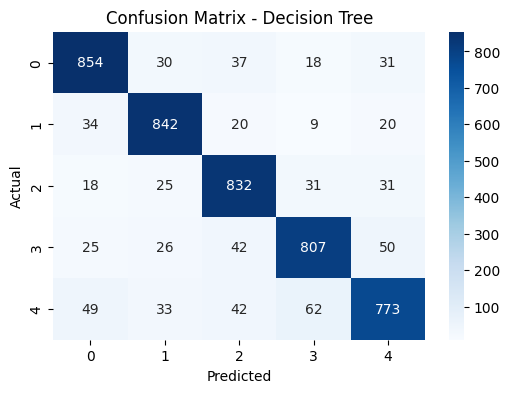


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       970
           2       0.90      0.93      0.92       925
           3       0.87      0.90      0.89       937
           4       0.87      0.88      0.87       950
           5       0.93      0.85      0.89       959

    accuracy                           0.90      4741
   macro avg       0.90      0.90      0.90      4741
weighted avg       0.90      0.90      0.90      4741



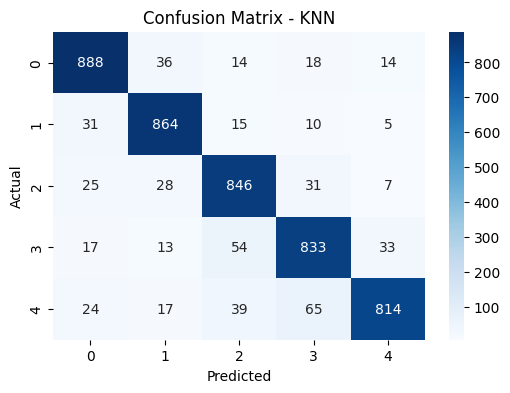


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.45      0.60      0.52       970
           2       0.54      0.63      0.58       925
           3       0.40      0.41      0.41       937
           4       0.43      0.38      0.40       950
           5       0.37      0.21      0.27       959

    accuracy                           0.45      4741
   macro avg       0.44      0.45      0.44      4741
weighted avg       0.44      0.45      0.44      4741



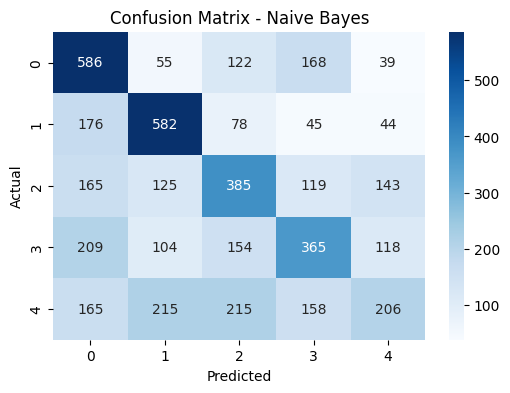


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.920903   0.920875  0.920987  0.920876
Decision Tree  0.866484   0.866393  0.866829  0.866330
KNN            0.895381   0.896043  0.895608  0.895317
Naive Bayes    0.448007   0.438765  0.448643  0.436197


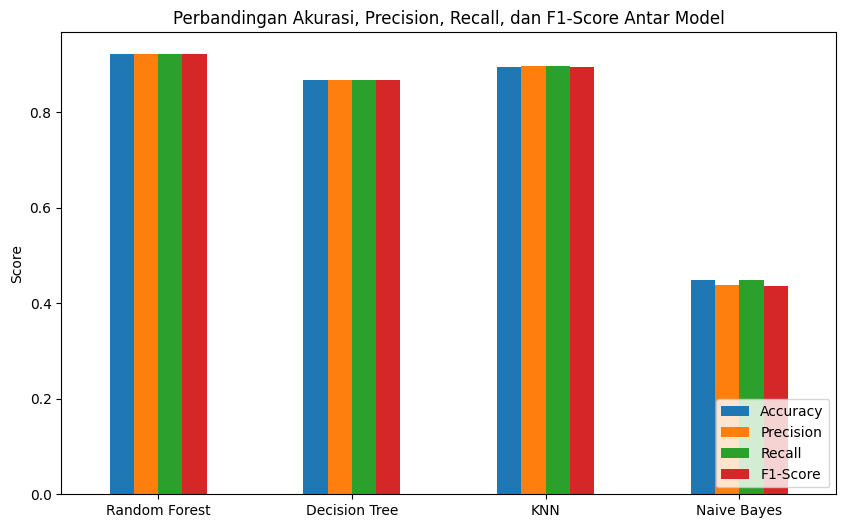

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 6

In [34]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 6 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)

Shape train PCA: (18964, 6)
Shape test PCA: (4741, 6)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       970
           2       0.94      0.94      0.94       925
           3       0.91      0.93      0.92       937
           4       0.91      0.91      0.91       950
           5       0.93      0.90      0.91       959

    accuracy                           0.92      4741
   macro avg       0.92      0.92      0.92      4741
weighted avg       0.92      0.92      0.92      4741



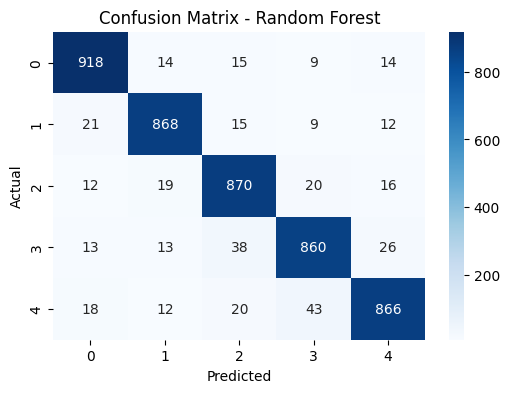


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.88      0.87      0.88       970
           2       0.87      0.91      0.89       925
           3       0.87      0.89      0.88       937
           4       0.87      0.86      0.87       950
           5       0.86      0.82      0.84       959

    accuracy                           0.87      4741
   macro avg       0.87      0.87      0.87      4741
weighted avg       0.87      0.87      0.87      4741



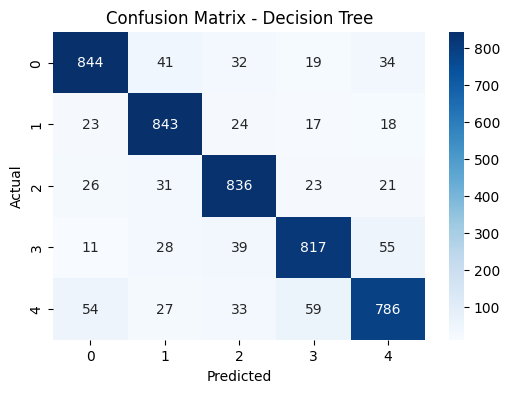


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.91      0.92      0.92       970
           2       0.90      0.92      0.91       925
           3       0.88      0.92      0.90       937
           4       0.88      0.90      0.89       950
           5       0.93      0.84      0.88       959

    accuracy                           0.90      4741
   macro avg       0.90      0.90      0.90      4741
weighted avg       0.90      0.90      0.90      4741



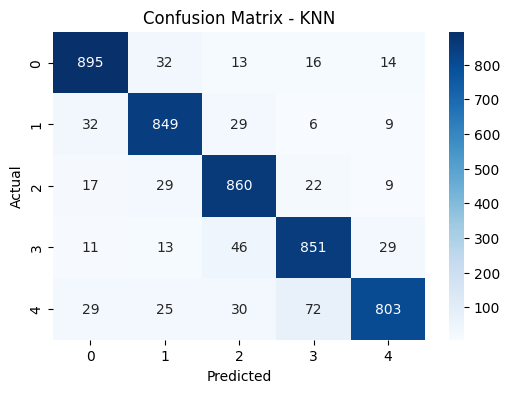


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.45      0.59      0.51       970
           2       0.53      0.64      0.58       925
           3       0.41      0.40      0.41       937
           4       0.42      0.41      0.41       950
           5       0.39      0.21      0.27       959

    accuracy                           0.45      4741
   macro avg       0.44      0.45      0.44      4741
weighted avg       0.44      0.45      0.44      4741



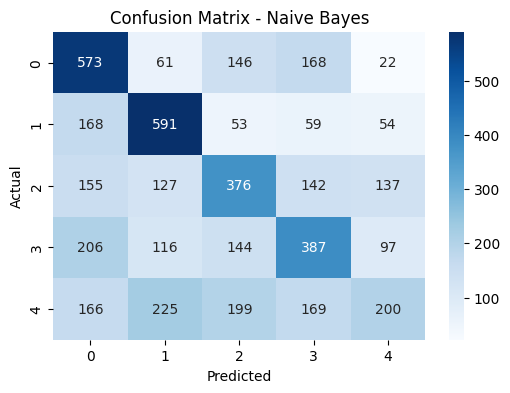


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.924278   0.924290  0.924310  0.924234
Decision Tree  0.870281   0.870209  0.870653  0.870181
KNN            0.898123   0.898782  0.898292  0.897924
Naive Bayes    0.448640   0.439939  0.449368  0.436109


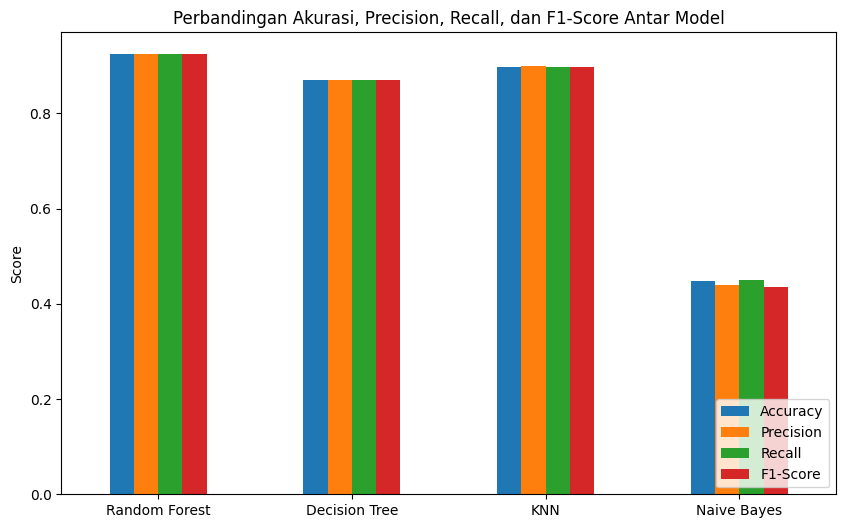

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 4

In [36]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 4 komponen
pca = PCA(n_components=4)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)

Shape train PCA: (18964, 4)
Shape test PCA: (4741, 4)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.85      0.88      0.87       970
           2       0.86      0.91      0.88       925
           3       0.85      0.88      0.86       937
           4       0.87      0.85      0.86       950
           5       0.85      0.75      0.80       959

    accuracy                           0.85      4741
   macro avg       0.85      0.85      0.85      4741
weighted avg       0.85      0.85      0.85      4741



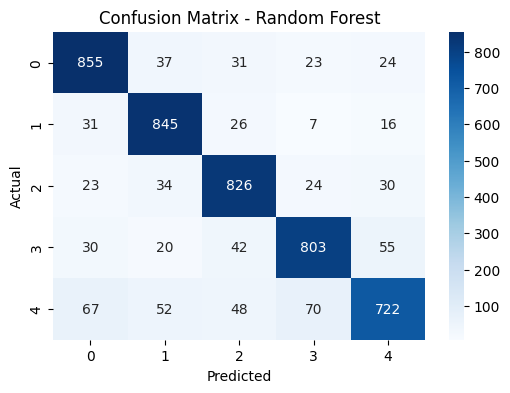


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.81      0.81      0.81       970
           2       0.81      0.87      0.84       925
           3       0.80      0.83      0.82       937
           4       0.80      0.80      0.80       950
           5       0.77      0.70      0.73       959

    accuracy                           0.80      4741
   macro avg       0.80      0.80      0.80      4741
weighted avg       0.80      0.80      0.80      4741



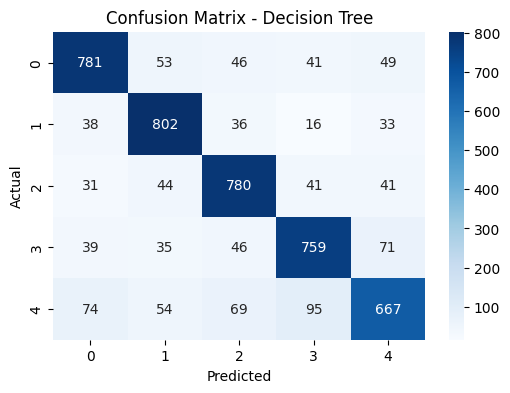


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.81      0.86      0.83       970
           2       0.82      0.88      0.85       925
           3       0.79      0.84      0.82       937
           4       0.83      0.81      0.82       950
           5       0.84      0.69      0.75       959

    accuracy                           0.82      4741
   macro avg       0.82      0.82      0.81      4741
weighted avg       0.82      0.82      0.81      4741



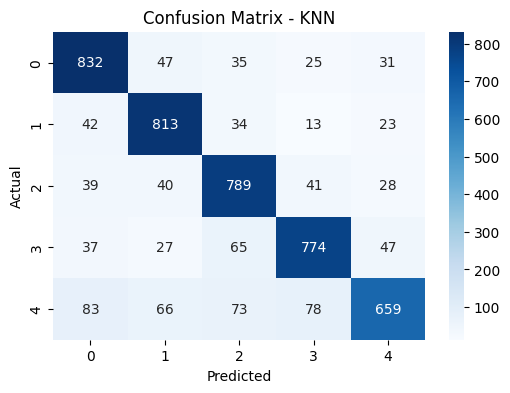


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.40      0.59      0.47       970
           2       0.45      0.62      0.52       925
           3       0.41      0.28      0.33       937
           4       0.39      0.33      0.36       950
           5       0.40      0.24      0.30       959

    accuracy                           0.41      4741
   macro avg       0.41      0.41      0.40      4741
weighted avg       0.41      0.41      0.40      4741



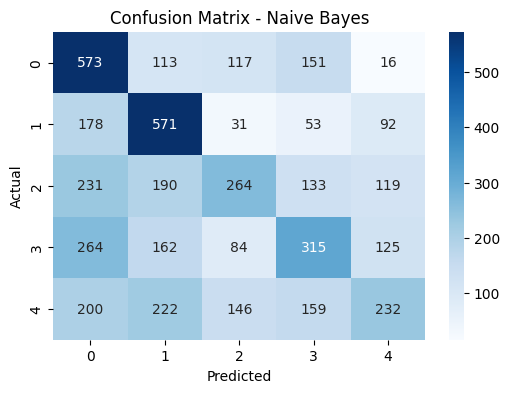


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.854461   0.854548  0.854925  0.853783
Decision Tree  0.799198   0.798612  0.799818  0.798533
KNN            0.815651   0.816796  0.816122  0.814452
Naive Bayes    0.412360   0.409409  0.412653  0.398065


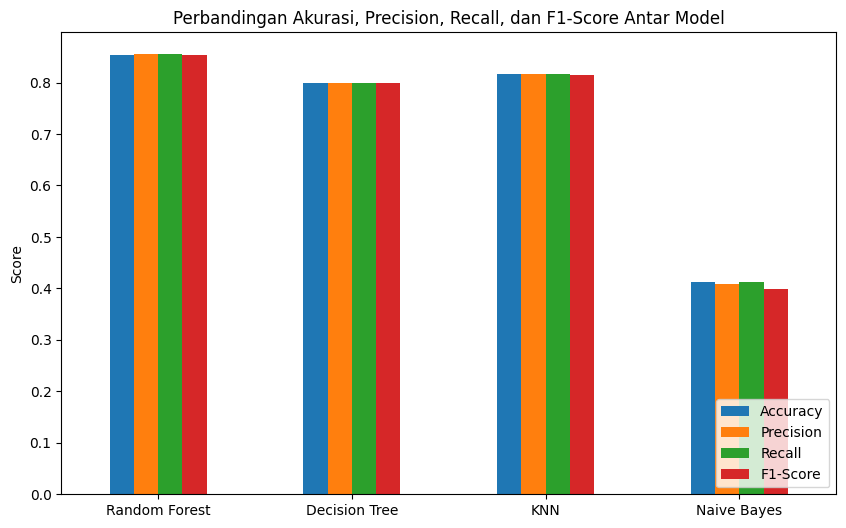

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 5

In [39]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 5 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)

Shape train PCA: (18964, 5)
Shape test PCA: (4741, 5)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       970
           2       0.89      0.93      0.91       925
           3       0.90      0.91      0.90       937
           4       0.90      0.88      0.89       950
           5       0.89      0.85      0.87       959

    accuracy                           0.90      4741
   macro avg       0.90      0.90      0.90      4741
weighted avg       0.90      0.90      0.90      4741



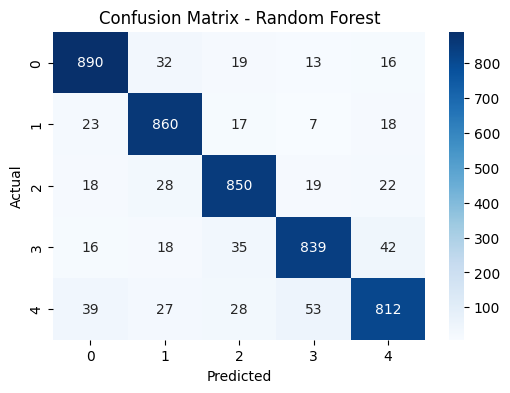


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.85      0.84      0.85       970
           2       0.85      0.89      0.87       925
           3       0.83      0.87      0.85       937
           4       0.84      0.82      0.83       950
           5       0.81      0.76      0.78       959

    accuracy                           0.84      4741
   macro avg       0.84      0.84      0.84      4741
weighted avg       0.84      0.84      0.84      4741



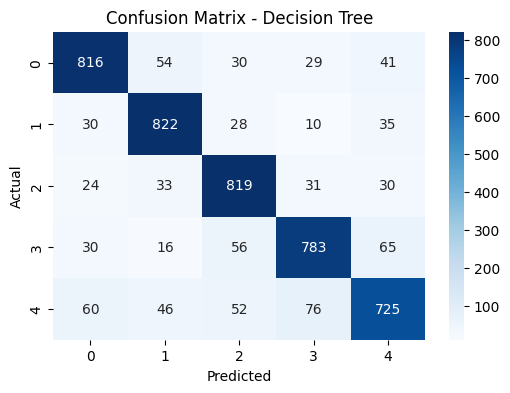


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.88      0.90      0.89       970
           2       0.87      0.91      0.89       925
           3       0.86      0.89      0.88       937
           4       0.86      0.87      0.87       950
           5       0.90      0.80      0.85       959

    accuracy                           0.87      4741
   macro avg       0.88      0.87      0.87      4741
weighted avg       0.88      0.87      0.87      4741



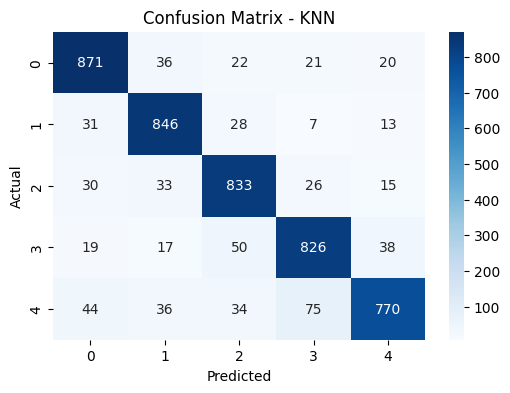


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.40      0.53      0.45       970
           2       0.52      0.66      0.59       925
           3       0.39      0.35      0.37       937
           4       0.37      0.37      0.37       950
           5       0.42      0.22      0.29       959

    accuracy                           0.42      4741
   macro avg       0.42      0.43      0.41      4741
weighted avg       0.42      0.42      0.41      4741



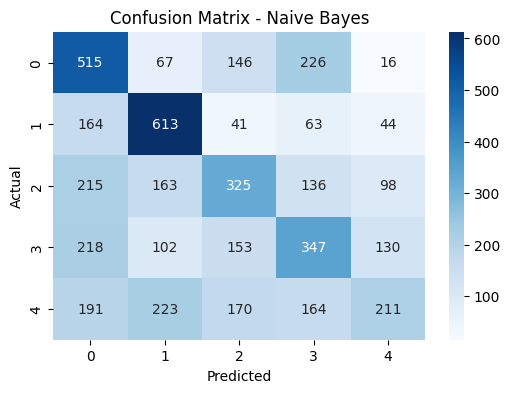


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.896646   0.896600  0.896856  0.896489
Decision Tree  0.836321   0.836003  0.836832  0.836003
KNN            0.874499   0.875045  0.874787  0.874202
Naive Bayes    0.424172   0.420573  0.425153  0.412627


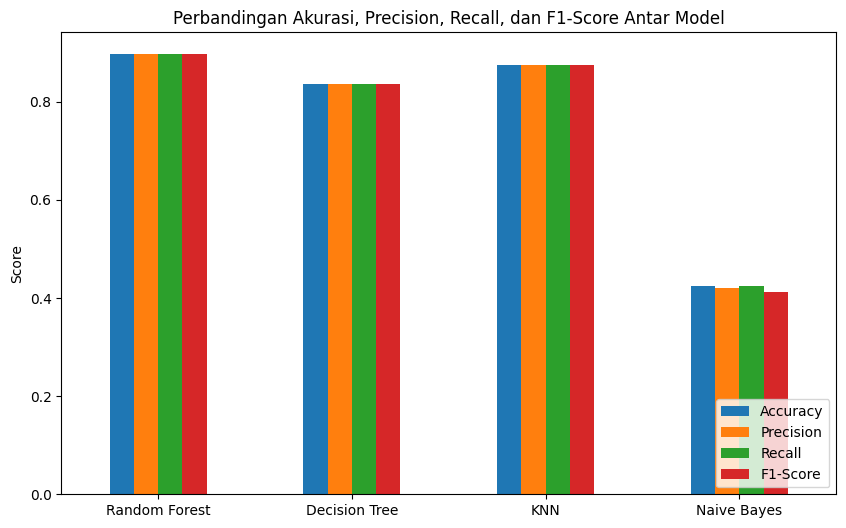

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 3

In [42]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 3 komponen
pca = PCA(n_components=3)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)

Shape train PCA: (18964, 3)
Shape test PCA: (4741, 3)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.74      0.80      0.77       970
           2       0.77      0.85      0.81       925
           3       0.79      0.77      0.78       937
           4       0.76      0.77      0.77       950
           5       0.72      0.60      0.66       959

    accuracy                           0.76      4741
   macro avg       0.76      0.76      0.76      4741
weighted avg       0.76      0.76      0.76      4741



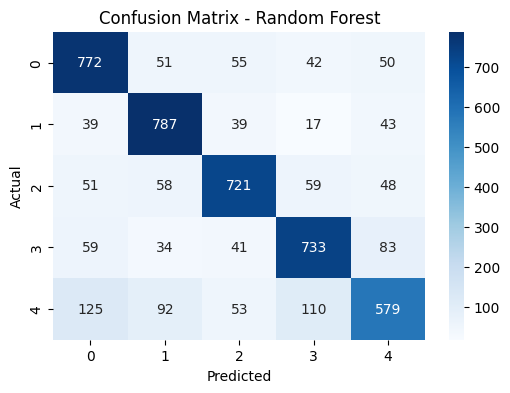


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.74      0.74      0.74       970
           2       0.74      0.79      0.77       925
           3       0.73      0.75      0.74       937
           4       0.72      0.74      0.73       950
           5       0.67      0.58      0.62       959

    accuracy                           0.72      4741
   macro avg       0.72      0.72      0.72      4741
weighted avg       0.72      0.72      0.72      4741



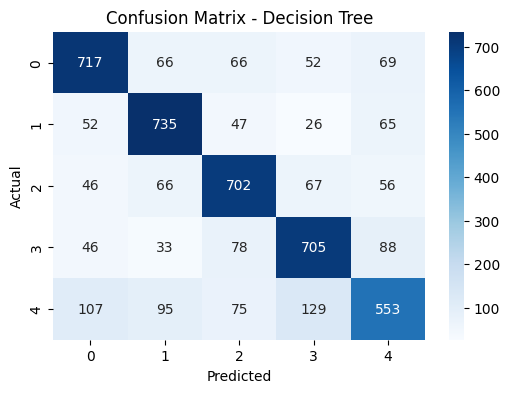


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.66      0.74      0.69       970
           2       0.71      0.79      0.75       925
           3       0.66      0.68      0.67       937
           4       0.69      0.68      0.68       950
           5       0.68      0.51      0.58       959

    accuracy                           0.68      4741
   macro avg       0.68      0.68      0.68      4741
weighted avg       0.68      0.68      0.68      4741



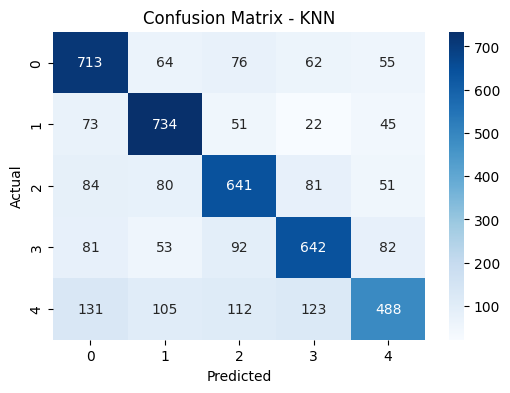


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.33      0.55      0.41       970
           2       0.39      0.64      0.48       925
           3       0.37      0.10      0.16       937
           4       0.27      0.20      0.23       950
           5       0.40      0.27      0.32       959

    accuracy                           0.35      4741
   macro avg       0.35      0.35      0.32      4741
weighted avg       0.35      0.35      0.32      4741



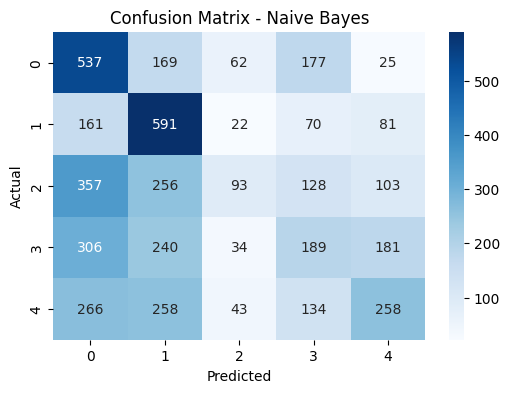


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.757646   0.757016  0.758299  0.755958
Decision Tree  0.719679   0.718038  0.720343  0.718279
KNN            0.678760   0.678817  0.679463  0.675803
Naive Bayes    0.351825   0.351095  0.351952  0.320963


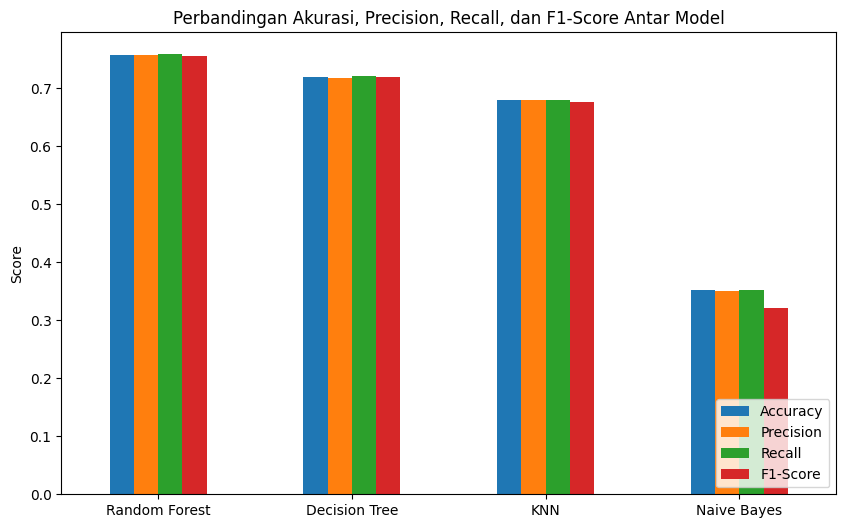

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

## N = 2

In [45]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 2 komponen
pca = PCA(n_components=2)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)

Shape train PCA: (18964, 2)
Shape test PCA: (4741, 2)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.62      0.64      0.63       970
           2       0.65      0.72      0.68       925
           3       0.65      0.67      0.66       937
           4       0.63      0.64      0.64       950
           5       0.59      0.49      0.53       959

    accuracy                           0.63      4741
   macro avg       0.63      0.63      0.63      4741
weighted avg       0.63      0.63      0.63      4741



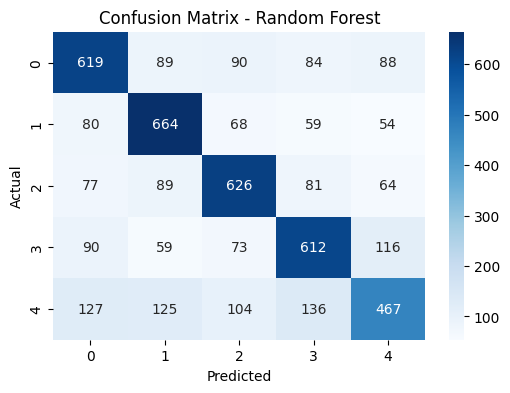


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.62      0.61      0.62       970
           2       0.62      0.68      0.65       925
           3       0.62      0.66      0.64       937
           4       0.64      0.63      0.63       950
           5       0.55      0.48      0.51       959

    accuracy                           0.61      4741
   macro avg       0.61      0.61      0.61      4741
weighted avg       0.61      0.61      0.61      4741



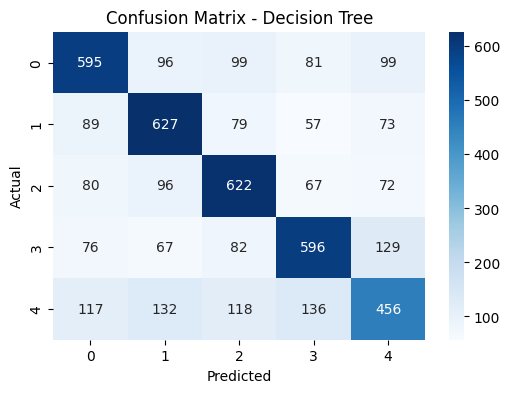


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.46      0.52      0.49       970
           2       0.52      0.63      0.57       925
           3       0.48      0.51      0.50       937
           4       0.51      0.47      0.49       950
           5       0.50      0.32      0.39       959

    accuracy                           0.49      4741
   macro avg       0.49      0.49      0.49      4741
weighted avg       0.49      0.49      0.49      4741



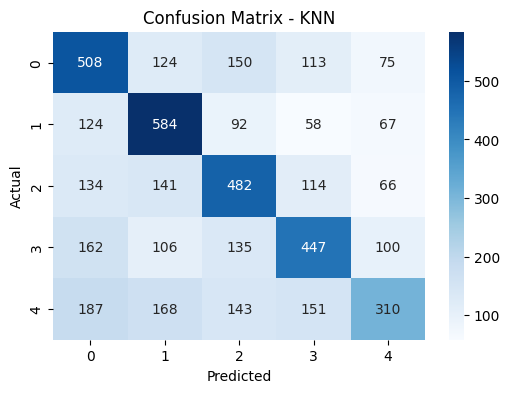


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.32      0.55      0.40       970
           2       0.32      0.65      0.43       925
           3       0.36      0.09      0.14       937
           4       0.30      0.11      0.16       950
           5       0.42      0.26      0.32       959

    accuracy                           0.33      4741
   macro avg       0.34      0.33      0.29      4741
weighted avg       0.34      0.33      0.29      4741



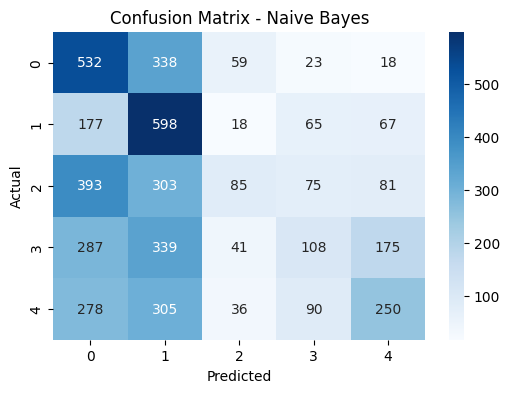


📊 Perbandingan Model:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.630247   0.628692  0.631050  0.628429
Decision Tree  0.610842   0.609156  0.611585  0.609384
KNN            0.491668   0.492905  0.492650  0.487129
Naive Bayes    0.331787   0.342909  0.332006  0.292263


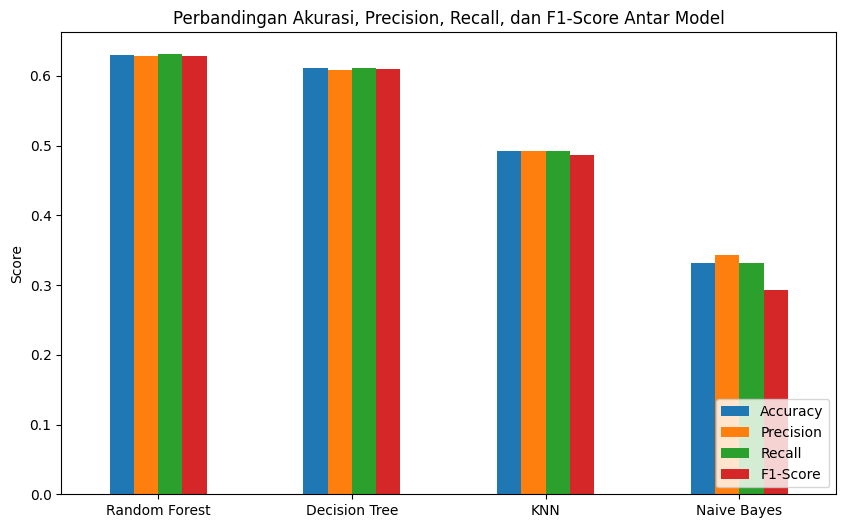

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_pca, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_pca)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()